# Tutorial to run HOD models using abacus simulation on NERSC
Should work under cosmodesi environment 

In [1]:
from HODDIES.hod import HOD

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20240118-1.0.0/conda/lib/python3.10/site-packages/asdf/entry_points.py:46: AsdfWarning: asdf.extensions plugin from package asdf-astropy==0.7.0 failed to load:

KeyError: 'Resource unavailable for URI: asdf://asdf-format.org/transform/manifests/transform-1.6.0'
  warnings.warn(


In [2]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj= HOD(read_Abacus=True)


Set number of threads to 128
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 ...
Done took 00:00:29
Compute columns...
Done took  00:00:01
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:31


In [3]:
# All parameters from the parameter file are set here
HOD_obj.args

{'tracers': ['ELG', 'LRG'],
 'LRG': {'Ac': 0.05,
  'As': 0.11,
  'HOD_model': 'SHOD',
  'sat_HOD_model': 'Nsat_pow_law',
  'M_0': 11.63,
  'M_1': 11.7,
  'Q': 100,
  'alpha': 0.6,
  'assembly_bias': {'c': [0, 0]},
  'conformity_bias': False,
  'density': 0.001,
  'f_sigv': 1,
  'gamma': 1,
  'log_Mcent': 11.63,
  'pmax': 0.1,
  'satellites': True,
  'shift_M_0': 0,
  'shift_M_1': 0.3,
  'sigma_M': 0.12,
  'use_shift': 'N',
  'vel_sat': 'rd_normal',
  'exp_frac': 0,
  'exp_scale': 1,
  'nfw_rescale': 1,
  'v_infall': 0,
  'vsmear': 0},
 'ELG': {'Ac': 0.05,
  'As': 0.11,
  'HOD_model': 'GHOD',
  'sat_HOD_model': 'Nsat_pow_law',
  'M_0': 11.63,
  'M_1': 11.7,
  'Q': 100,
  'alpha': 0.6,
  'assembly_bias': {'c': [0, 0]},
  'conformity_bias': False,
  'density': 0.001,
  'f_sigv': 1,
  'gamma': 1,
  'log_Mcent': 11.63,
  'pmax': 0.1,
  'satellites': True,
  'shift_M_0': 0,
  'shift_M_1': 0.3,
  'sigma_M': 0.12,
  'use_shift': 'N',
  'vel_sat': 'rd_normal',
  'exp_frac': 0,
  'exp_scale': 1,

In [33]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')

print('Satelitte HOD model is the standard power law')

Tracers considered ['ELG', 'LRG']
HOD model for ELG: GHOD
HOD model for LRG: SHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [36]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'SHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'shift_M_0': 0, 'shift_M_1': 0.3, 'sigma_M': 0.12, 'use_shift': 'N', 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'shift_M_0': 0, 'shift_M_1': 0.3, 'sigma_M': 0.12, 'use_shift': 'N', 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': None}


In [18]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['ELG', 'LRG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.25470685958862305
Start satellite assignement
Using particles
No particles found continue with NFW
Satellite assignement done 0.42410993576049805
ELG mock catalogue done 0.4474949836730957
461079 central galaxies, 537130 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.1189982891082764
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.1435296535491943
Start satellite assignement
Using particles
No particles found continue with NFW
Satellite assignement done 0.5358843803405762
LRG mock catalogue done 0.5554559230804443
258747 central galaxies, 740442 satellites, fraction of satellite 0.74 
Done overall time  LRG 2.385746717453003
Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.2553255558013916
Start satellite assignement
Using particles
No particles found continue with NFW
Satellite assignement done 0.4396448135375

({'ELG': Catalog(csize=998209, size=998209, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'row_id', 'Central']),
  'LRG': Catalog(csize=999189, size=999189, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'row_id', 'Central'])},
 {'ELG': Catalog(csize=999373, size=999373, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'row_id', 'Central'])})

In [20]:
# By default the code automatically
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg['ELG'].size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size wo density constrain:', cat_elg_nodens['ELG'].size)


Density fixed to  False ELG catalogue size: 999373
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.27226948738098145
Start satellite assignement
Using particles
No particles found continue with NFW
Satellite assignement done 0.8538661003112793
ELG mock catalogue done 0.9201548099517822
1014182 central galaxies, 1186212 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.6809229850769043
ELG catalogue size wo density constrain: 2200394


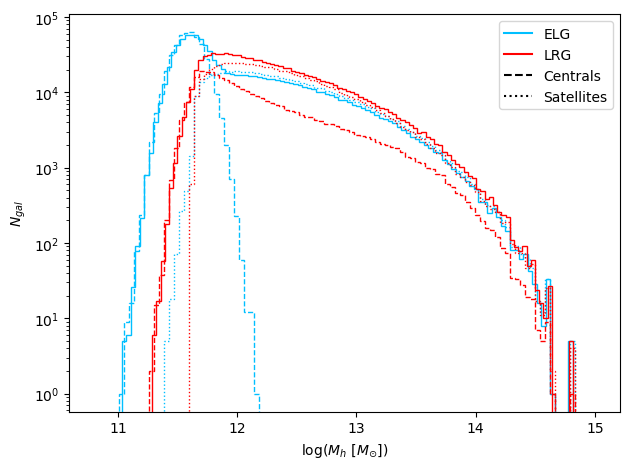

In [ ]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True, )


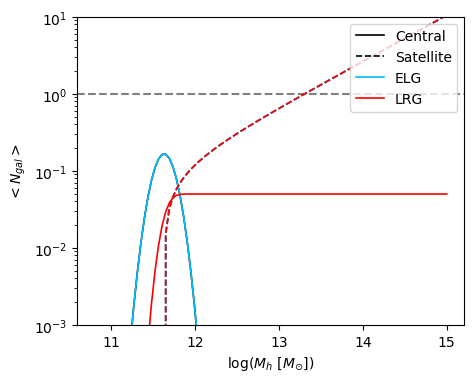

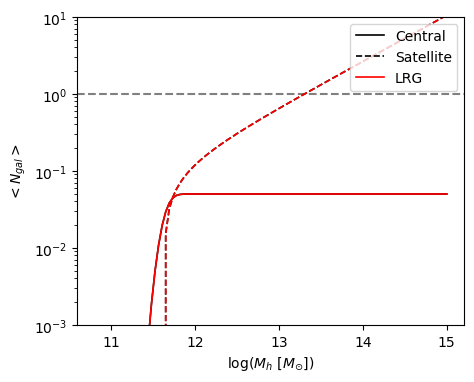

In [39]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [40]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'seed': None,
 'edges_rppi': (array([1.00000000e-02, 1.37747857e-02, 1.89744720e-02, 2.61369285e-02,
         3.60030589e-02, 4.95934420e-02, 6.83139034e-02, 9.41009377e-02,
         1.29622025e-01, 1.78551561e-01, 2.45950949e-01, 3.38792160e-01,
         4.66678939e-01, 6.42840237e-01, 8.85498648e-01, 1.21975541e+00,
         1.68018693e+00, 2.31442149e+00, 3.18806600e+00, 4.39149258e+00,
         6.04918691e+00, 8.33262532e+00, 1.14780128e+01, 1.58107166e+01,
         2.17789233e+01, 3.00000000e+01]),
  array([-40., -39., -38., -37., -36., -35., -34., -33., -32., -31., -30.,
         -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
         -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,
          -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3

In [41]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Computing wp for ELG...
#wp for ELG computed !time = 0.243 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.229 s


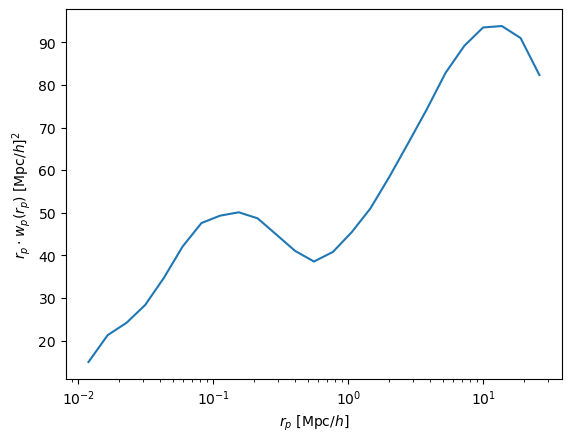

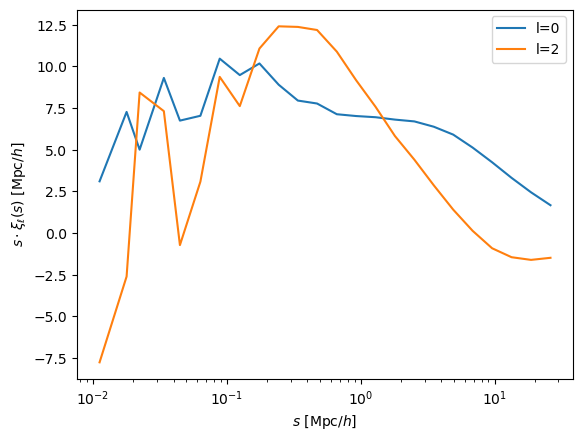

In [ ]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [44]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG') for ii in np.random.randint(0,2**32, size=10)]


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 2.0527803897857666
Start satellite assignement
Satellite assignement done 2.7955541610717773
ELG mock catalogue done 2.8258914947509766
460421 central galaxies, 537537 satellites, fraction of satellite 0.54 
Done overall time  ELG 5.4320409297943115
Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.4393789768218994
Start satellite assignement
Satellite assignement done 0.8204784393310547
ELG mock catalogue done 0.8679609298706055
461308 central galaxies, 537860 satellites, fraction of satellite 0.54 
Done overall time  ELG 2.119152307510376
Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.4048140048980713
Start satellite assignement
Satellite assignement done 0.5532925128936768
ELG mock catalogue done 0.5891029834747314
460147 central galaxies, 537716 satellites, fraction of satellite 0.54 
Done overall time

#Computing wp for ELG...
#wp for ELG computed !time = 0.214 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.261 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.218 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.231 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.235 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.217 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.266 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.209 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.197 s
#Computing wp for ELG...
#wp for ELG computed !time = 0.194 s


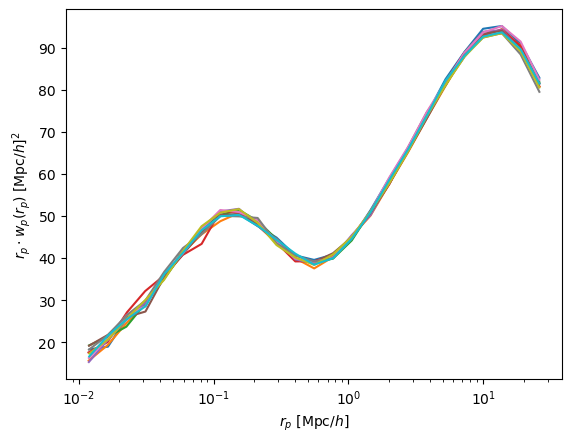

#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 0.928 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 0.938 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.091 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.076 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.008 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.027 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.062 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.023 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.031 s
#Computing 2PCF for ELG...
#2PCF for ELG computed !time = 1.102 s


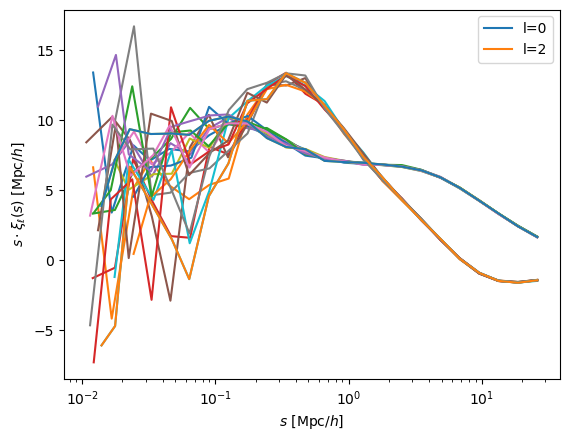

In [50]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

False

# Use particles for satelittes instead of NFW

In [9]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, read_Abacus=True)


Set number of threads to 128
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z1.100 with particles...
Done took 00:00:58
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 1.1 loaded, took 00:00:59


In [10]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles, so it might no work with 2Gpc/h box
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['ELG', 'LRG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 6.053028583526611
Start satellite assignement
Using particles
23 satellites will be positioned using NFW


/global/u1/a/arocher/Code/postdoc/HOD/Dev/HODDIES/HODDIES/utils.py:269: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "utils.py", line 231:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale


Satellite assignement done 16.474888563156128
ELG mock catalogue done 16.50019931793213
459870 central galaxies, 538115 satellites, fraction of satellite 0.54 
Done overall time  ELG 23.022618293762207
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 21.40240788459778
Start satellite assignement
Using particles
40 satellites will be positioned using NFW
Satellite assignement done 0.3899223804473877
LRG mock catalogue done 0.4346184730529785
258320 central galaxies, 740524 satellites, fraction of satellite 0.74 
Done overall time  LRG 28.41331672668457


{'ELG': Catalog(csize=997985, size=997985, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'npstartA', 'npoutA', 'row_id', 'Central']),
 'LRG': Catalog(csize=998844, size=998844, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'npstartA', 'npoutA', 'row_id', 'Central'])}

In [12]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None) 
cats 

Create mock catalog for ['ELG', 'LRG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.33685779571533203
Start satellite assignement
Using particles
29 satellites will be positioned using NFW
Satellite assignement done 0.29238009452819824
ELG mock catalogue done 0.34725141525268555
460835 central galaxies, 538368 satellites, fraction of satellite 0.54 
Done overall time  ELG 1.1673595905303955
Run HOD for LRG
Set density to 0.001 gal/Mpc/h
HOD Computed 1.3621783256530762
Start satellite assignement
Using particles
42 satellites will be positioned using NFW
Satellite assignement done 0.3807368278503418
LRG mock catalogue done 0.4339311122894287
259002 central galaxies, 740143 satellites, fraction of satellite 0.74 
Done overall time  LRG 2.655411958694458


{'ELG': Catalog(csize=999203, size=999203, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'npstartA', 'npoutA', 'row_id', 'Central']),
 'LRG': Catalog(csize=999145, size=999145, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'npstartA', 'npoutA', 'row_id', 'Central'])}